In [56]:
# Use this cell to begin your analyses, and add as many cells as you would like!
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("datasets/lego_sets.csv")
parent_theme = pd.read_csv("datasets/parent_themes.csv")
df = df.dropna(subset="set_num")
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [57]:
df = pd.merge(df, parent_theme.rename({"name": "parent_theme"}, axis="columns").drop("id", axis=1), how="inner")


In [58]:
licensed_df = df[df['is_licensed'] == True]
licensed_df.head()

,set_num,name,year,num_parts,theme_name,parent_theme,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,True


In [59]:
n_starwars = licensed_df[licensed_df['parent_theme'] == "Star Wars"].count().iloc[1]
n_sets = licensed_df["parent_theme"].count()
the_force = int(n_starwars / n_sets * 100)

### In which year was star wars not the most released set?

In [60]:
licensed_df.sort_values(by="year").head()

,set_num,name,year,num_parts,theme_name,parent_theme,is_licensed
3702,7161-1,Gungan Sub,1999,379.0,Star Wars Episode 1,Star Wars,True
3705,7171-1,Mos Espa Podrace,1999,NaN,Star Wars Episode 1,Star Wars,True
3690,7140-1,X-wing Fighter,1999,271.0,Star Wars Episode 4/5/6,Star Wars,True
3685,7130-1,Snowspeeder,1999,NaN,Star Wars Episode 4/5/6,Star Wars,True
3684,7128-1,Speeder Bikes,1999,93.0,Star Wars Episode 4/5/6,Star Wars,True


In [61]:
yearly_count = licensed_df[["parent_theme", "year"]].sort_values(by="year").groupby(["year", "parent_theme"]
                                                                                   )["parent_theme"].count().unstack("parent_theme")

In [62]:
yearly_count = yearly_count.fillna(0)
yearly_count = yearly_count.apply(lambda x: pd.to_numeric(x,downcast="integer"))
yearly_count

parent_theme,Angry Birds,Avatar,Ben 10,Cars,Disney,Disney Princess,Disney's Mickey Mouse,Ghostbusters,Harry Potter,Indiana Jones,...,Pirates of the Caribbean,Prince of Persia,Scooby-Doo,SpongeBob SquarePants,Star Wars,Super Heroes,Teenage Mutant Ninja Turtles,The Hobbit and Lord of the Rings,The Lone Ranger,Toy Story
year,,,,,,,,,,,,,,,,,,,,,
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,13,0,0,0,0,0
2000,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,26,0,0,0,0,0
2001,0,0,0,0,0,0,0,0,11,0,...,0,0,0,0,14,0,0,0,0,0
2002,0,0,0,0,0,0,0,0,19,0,...,0,0,0,0,28,3,0,0,0,0
2003,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,32,5,0,0,0,0
2004,0,0,0,0,0,0,0,0,14,0,...,0,0,0,0,20,6,0,0,0,0
2005,0,0,0,0,0,0,1,0,5,0,...,0,0,0,0,28,1,0,0,0,0
2006,0,2,0,0,0,0,0,0,0,0,...,0,0,0,3,11,8,0,0,0,0
2007,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,16,2,0,0,0,0


In [63]:
d = yearly_count.iloc[:,:]

<Axes: xlabel='year'>

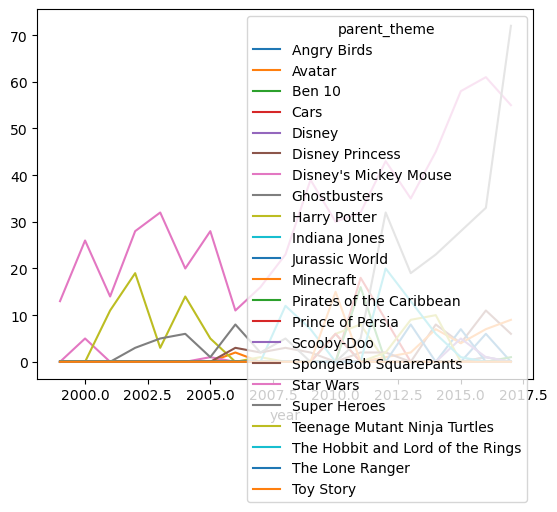

In [77]:
d.plot()

#### its 2017 clearly